# Exercise 5


1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

Your submission should be your Jupyter notebook, keep it short and concise.

# 1 - 3)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mushroom_data = pd.read_csv('agaricus-lepiota.data')

df = pd.DataFrame(mushroom_data)

# 4)

In [19]:
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [14]:
df[['edibility', 'habitat']].groupby('habitat').describe().transpose()

habitat              d     g    l    m     p    u    w
edibility count   3148  2148  832  292  1144  368  192
          unique     2     2    2    2     2    2    1
          top        e     e    p    e     p    p    e
          freq    1880  1408  592  256  1008  272  192

In [15]:
df[['edibility', 'habitat']].groupby('edibility').describe().transpose()

edibility          e     p
habitat count   4208  3916
        unique     7     6
        top        d     d
        freq    1880  1268

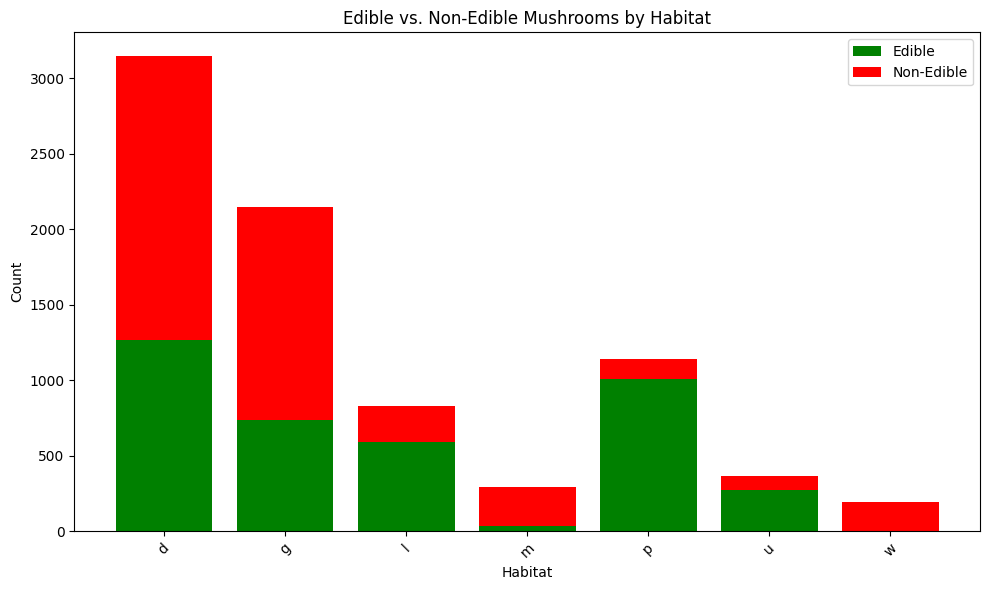

In [38]:
edible = df[df['edibility'] == 'p']
non_edible = df[df['edibility'] == 'e']

edible_habitat_counts = edible['habitat'].value_counts()
non_edible_habitat_counts = non_edible['habitat'].value_counts()

habitat_counts_df = pd.DataFrame({'Edible': edible_habitat_counts, 'Non-Edible': non_edible_habitat_counts}).fillna(0)
plt.figure(figsize=(10, 6))

# Edible mushrooms
plt.bar(habitat_counts_df.index, habitat_counts_df['Edible'], color='green', label='Edible')
# Non edible mushrooms
plt.bar(habitat_counts_df.index, habitat_counts_df['Non-Edible'], color='red', bottom=habitat_counts_df['Edible'], label='Non-Edible')

plt.xlabel('Habitat')
plt.ylabel('Count')
plt.title('Edible vs. Non-Edible Mushrooms by Habitat')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5)

In [16]:
dummy_df = pd.get_dummies(df)
dummy_df

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


# 6)

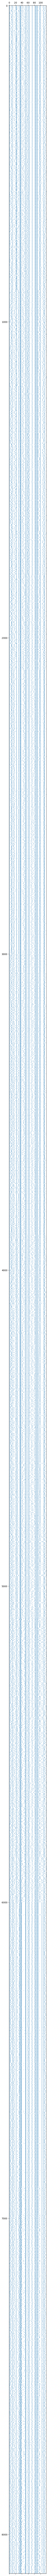

In [49]:
plt.spy(dummy_df, markersize=0.4)
fig = plt.gcf()
fig.set_size_inches(50,200)
plt.plot()
plt.show()